# Détection des attaques DDoS pour la sécurité des réseaux d'entreprise

https://asterius.federation.edu.au/csmining.org/cdmc2018/index.php?id=5

Cet ensemble de données contient le trafic d'une entreprise dans un scénario d'attaque pendant 24 heures. Pour effectuer l'analyse des données, plus de 70 caractéristiques sont extraites du trafic réseau de toutes les machines de cette organisation.

Les données d'apprentissage portent sur deux types : "Benign" et "Attack". Le comportement normal (Benign) comprend cinq types d'activités quotidiennes des utilisateurs, telles que la vérification des courriels et le transfert de fichiers entre les utilisateurs de l'organisation. L'activité anormale est une attaque DDoS sur une machine, où nous avons étiqueté le trafic comme "Attack". Les étiquettes pour les données d'apprentissage ont été placées dans la dernière colonne.

Pour les données de test, il s'agit d'un mélange de trafic normal et de trafic d'attaque. Les participants sont censés trouver l'étiquette pour chaque flux (enregistrement) comme "Benign" ou "Attack". Non disponibles ici.

Référence : Ali Ghorbani et Arash Habibi Lashkari, CDMC2018 Dataset : Détection des attaques DDoS pour la sécurité des réseaux d'entreprise, Institut canadien de cybersécurité, Université du Nouveau-Brunswick, http://www.csmining.org/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn import linear_model
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

## 1 - Importation  et préparation des données



In [2]:
data = pd.read_csv("C:/Users/saido/OneDrive/Bureau/MLR/I/DDoS_attacks.csv", sep=",", header=0)

In [3]:
data

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,276098,9007362,3,0,0,0,0,0,0.000000,0.000000,...,28,3006088.0,0.0,3006088,3006088,6001274.0,0.0,6001274,6001274,Benign
1,107561,40134,1,1,78,160,78,78,78.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,349558,361,1,1,48,64,48,48,48.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,162685,5008,11,1,8117,0,1460,0,737.909091,723.306499,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,224641,931,1,1,42,102,42,42,42.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92990,323943,377,3,0,77,0,46,0,25.666667,23.459184,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
92991,53341,57,2,0,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
92992,18323,208188,11,11,1195,1969,648,0,108.636364,196.115411,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
92993,34323,5196649,4,4,97,232,97,0,24.250000,48.500000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [4]:
print(data.shape)

(92995, 68)


 On retire la colonne des numéros d'observation et on vérifie qu'il n'y a pas de variables de variance nulle. 

Si la variance est nulle, ça signifie que les valeurs sont les mêmes pour tous les individus, la variable n'apporte donc pas d'information utile. 


In [5]:
data1 = data.drop(columns=["Unnamed: 0"])

sd = data1.std()
print(sd.shape)
print("Variables avec écart-type nul : ",np.where(sd==0))
print("Variables avec écart-type non défini : ",np.where(np.isnan(sd)))


(66,)
Variables avec écart-type nul :  (array([], dtype=int64),)
Variables avec écart-type non défini :  (array([], dtype=int64),)


Le graphique suivant montre que les attaques sont très minoritaires dans la base de données. 


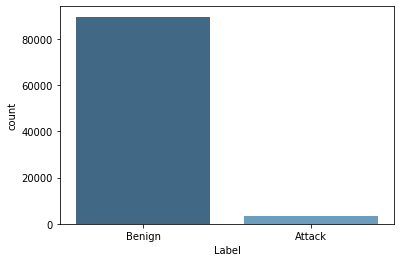

In [6]:
sns.countplot(x="Label",data=data1,palette="Blues_d")

Tranformation des données en tableau numpy et préparation pour le Machine Learning. 


In [7]:
data_np = data1.to_numpy()

X = data_np[:,:-1]
Y = data_np[:,-1]

## Préparation des données pour le machine learning
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

print("Pourcentage d'attaque dans la base complète : ",np.round(np.mean(Y=="Attack"),3))
print("Pourcentage d'attaque dans la base d'apprentissage : ",np.round(np.mean(y_train=="Attack"),3))

Pourcentage d'attaque dans la base complète :  0.037
Pourcentage d'attaque dans la base d'apprentissage :  0.037


La fonction StandardScaler() permet de normaliser les données. Par défaut elle centre (retire la moyenne) et réduit (divise par l'écart-type). 

Ici on utilise les moyennes et les écarts-type de l'ensemble d'apprentissage qu'on applique aussi à l'ensemble de test. 

In [8]:
# Pre-processing
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Visualisation sur le premier plan de l'ACP

(27898, 2)
(27898,)


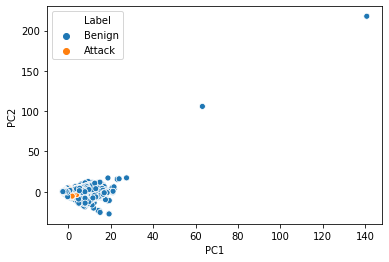

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PC = pca.transform(X_train_sc)
print(PC.shape)
print(y_train.shape)

d = {'PC1': PC[:,0], 'PC2': PC[:,1], 'Label':y_train}
df = pd.DataFrame(data=d)

sns.scatterplot(x="PC1",y="PC2",hue="Label",data = df)

## Algorithme des plus proches voisins

Un premier appel, sans optimisation du nombre de voisins. 

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)

In [11]:
f1 = f1_score(y_test,y_pred,pos_label="Attack")
r = recall_score(y_test,y_pred,pos_label="Attack")
p = precision_score(y_test,y_pred,pos_label="Attack")
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.988 recall: 0.988 f1-score: 0.988


On affiche la matrice de confusion

In [12]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix : ")
print(cm)

Confusion matrix : 
[[ 2411    30]
 [   30 62626]]


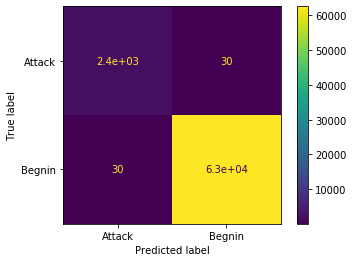

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=["Attack","Begnin"]).plot()

On trace une courbe ROC

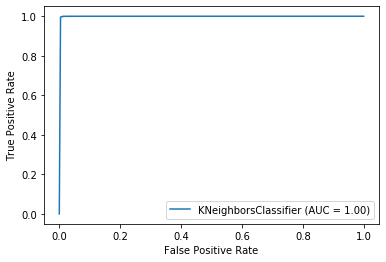

In [14]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, X_test_sc, y_test)  
plt.show()

On observe qu'on obtient de très bons résultats : l'aire sous la courbe ROC est égale à 1 et le nombre l'intrusions mal classées est faible. Cependant, on a plus d'erreur dans la classe des attaques.

On peut chercher à optimiser le nombre de voisins en utilisant, par exemple, la fonction GridSearchCV.


#### Validation croisée à la main 

In [39]:
from sklearn.model_selection import KFold
B = 5
cv = KFold(n_splits=B, random_state=None, shuffle=True)
n_voisins = np.arange(1,20,3)
acc = np.zeros((n_voisins.shape[0],B))
accuracy_min = np.zeros(n_voisins.shape[0])
accuracy_mean = np.zeros(n_voisins.shape[0])
accuracy_max = np.zeros(n_voisins.shape[0])
i = 0
for K in n_voisins:
    folds = cv.split(y_train)
    j = 0
    for train_index, test_index in folds:
        X_train_cv, X_test_cv = X_train_sc[train_index], X_train_sc[test_index]
        Y_train_cv, Y_test_cv = y_train[train_index], y_train[test_index]
        knn = neighbors.KNeighborsClassifier(n_neighbors = K)
        knn.fit(X_train_cv, Y_train_cv)
        Y_pred = knn.predict(X_test_cv)
        p = precision_score(Y_test_cv, Y_pred, pos_label="Attack")
        acc[i,j] = p
        j = j+1
    i = i+1

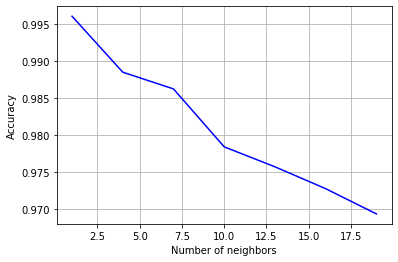

In [40]:
acc_mean = acc.mean(axis = 1)
fig, ax = plt.subplots()
plt.plot(n_voisins, acc_mean, color = 'b')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid()

## Optimisation des hyperparamètres avec la fonction GridSearchCV

Ici on fait varier le nombre de voisins, la distance entre les individus et les poids pour l'estimation de la "moyenne" (ici la probabilité d'être dans l'une ou l'autre des classes).

In [17]:
# Generation de B ensemble d'entrainement/validation 
B = 5
cv = KFold(n_splits=B, random_state=None, shuffle=True)
knn = neighbors.KNeighborsClassifier()
param_grid = [{'n_neighbors': [1,5,10,20], 
               'weights': ['uniform','distance'],
               'metric': ['euclidean','manhattan']}]
# Optimization of the hyperparameters
search = GridSearchCV(knn, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1) # n_jobs=-1 permet d'utiliser tous les processeurs (calcul parallèle)
search.fit(X_train_sc,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
knn_best = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
y_pred_knn = search.best_estimator_.predict(X_test_sc)
print("Confusion matrix : ")
print(confusion_matrix(y_test,y_pred_knn))
print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_knn),4))

Confusion matrix : 
[[ 2430    11]
 [    7 62649]]
Accuracy :  0.999723


# Analyse discriminante linéaire

On peut comparer les résultats obtenus par l'algorithme des plus proches voisins avec ceux d'une analyse discriminante. 

Confusion matrix (LDA): 
[[ 1986   455]
 [  154 62502]]


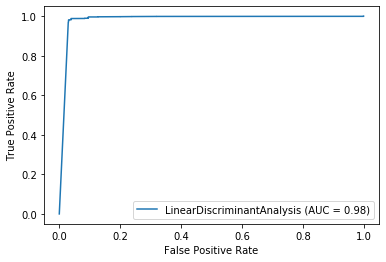

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sc,y_train)
y_pred_lda = lda.predict(X_test_sc)

print("Confusion matrix (LDA): ")
print(confusion_matrix(y_test,y_pred_lda))

plot_roc_curve(lda, X_test_sc, y_test)  
plt.show()

In [45]:
f1 = f1_score(y_test,y_pred_lda,pos_label="Attack")
r = recall_score(y_test,y_pred_lda,pos_label="Attack")
p = precision_score(y_test,y_pred_lda,pos_label="Attack")
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.928 recall: 0.814 f1-score: 0.867


# Regression logistique

In [46]:
clf = linear_model.LogisticRegression(max_iter = 3000)
clf.fit(X_train_sc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
param_grid = {'C':[1e-03,1e-02,1e-01,1,10,100,1000]}
clf = linear_model.LogisticRegression(penalty='l1',
                                      solver='saga',
                                      max_iter=1e4)
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train_sc,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

# Meilleur modèle
# LogisticRegression(C=100, max_iter=10000.0, penalty='l1', solver='saga')
